In [1]:
import pandas as pd
import numpy as np
from math import erf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime as dt
import os,sys
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline
NUM_ITER = 10000
DAY_OF_SIM = dt.today() # dt.strptime(open("datefile.txt",'r').read()[:-1], '%d-%m-%Y') # 

In [2]:
republican_red = "#cf1313"
democratic_blue = "#116dc2"
other_grey = "#8a8a8a"
republican_red_alphaed = "rgba(207, 19, 19, 0.2)"
democratic_blue_alphaed = "rgba(17, 109, 194, 0.2)"
other_grey_alphaed = "rgba(138, 138, 138,0.2)"

color_mapper = {"Kamala Harris":democratic_blue,"Harris":democratic_blue,"Donald Trump":republican_red,"Trump":republican_red,"Others":other_grey,"Other":other_grey}
color_mapper_alphaed = {"Kamala Harris":democratic_blue_alphaed,"Harris":democratic_blue_alphaed,"Donald Trump":republican_red_alphaed,"Trump":republican_red_alphaed,"Others":other_grey_alphaed,"Other":other_grey_alphaed}

In [3]:
def strreplace(s):
    try:
        return s.str.replace('"', "")
    except:
        try:
            return s.replace('"', "")
        except:
            return s


In [4]:
df = pd.read_csv("../1976-2020-president.csv") # Read in the election results in each state going back to 1976.
df_district =  pd.read_csv("../2008-2020-president_district.csv").apply(strreplace)
df_district.columns=[strreplace(val) for val in df_district.columns]

In [5]:
# df = pd.concat([df,df_district],axis=0)





In [6]:
STARTYEAR = 0 #YEAR WHEN WE START INTERPRETING THE DATA
ELECTIONYEAR = 2024 # YEAR WE WANT TO PREDICT
df = df[(STARTYEAR <= df['year']) & (df['year']<ELECTIONYEAR)] # SLICE THE DATA FOR ABOVE


In [7]:
df['party_simplified'] = df['party_simplified'].apply(lambda x: x if x in ['DEMOCRAT', 'REPUBLICAN'] else '3RDPARTY') # COMPRESS ALL THIRD PARTIES INTO ONE VALUE

df_grouped = df.groupby(['year', 'state_po', 'party_simplified'], as_index=False).agg({'candidatevotes': 'sum'}) # 
# nyslice = df_grouped[df_grouped['state_po']=="NY"].copy()

# me1filled = nyslice.copy()
# me1filled['candidatevotes']=np.nan
# me1filled['state_po']="ME-1"
# me1_unfilled = df_grouped[df_grouped['state_po']=="ME-1"].copy()
# me1filled = me1filled.set_index(['year','party_simplified']).combine_first(me1_unfilled.set_index(['year','party_simplified'])).reset_index()

# me2filled = nyslice.copy()
# me2filled['candidatevotes']=np.nan
# me2_unfilled = df_grouped[df_grouped['state_po']=="ME-2"].copy()
# me2filled = me2filled.set_index(['year','party_simplified']).combine_first(me2_unfilled.set_index(['year','party_simplified'])).reset_index()
# me2filled['state_po']="ME-2"

# ne1filled = nyslice.copy()
# ne1filled['candidatevotes']=np.nan
# ne1_unfilled = df_grouped[df_grouped['state_po']=="NE-1"].copy()
# ne1filled = ne1filled.set_index(['year','party_simplified']).combine_first(ne1_unfilled.set_index(['year','party_simplified'])).reset_index()
# ne1filled['state_po']="NE-1"

# ne2filled = nyslice.copy()
# ne2filled['candidatevotes']=np.nan
# ne2_unfilled = df_grouped[df_grouped['state_po']=="NE-2"].copy()
# ne2filled = ne2filled.set_index(['year','party_simplified']).combine_first(ne2_unfilled.set_index(['year','party_simplified'])).reset_index()
# ne2filled['state_po']="NE-2"

# ne3filled = nyslice.copy()
# ne3filled['candidatevotes']=np.nan
# ne3_unfilled = df_grouped[df_grouped['state_po']=="NE-3"].copy()
# ne3filled = ne3filled.set_index(['year','party_simplified']).combine_first(ne3_unfilled.set_index(['year','party_simplified'])).reset_index()
# ne3filled['state_po']="NE-3"

# df_grouped = df_grouped[~df_grouped['state_po'].isin(["ME-1","ME-2","NE-1","NE-2","NE-3"])]
# df_grouped = pd.concat([df_grouped,ne1filled,ne2filled,ne3_unfilled,me1filled,me2filled],axis=0).copy().reset_index().drop('index',axis=1)


state_votes = df_grouped.pivot_table(index='state_po', columns=['party_simplified','year'], values='candidatevotes', fill_value=0) # GET THE STATE VOTES BY PARTY BY YEAR


In [8]:
state_votes

party_simplified 3RDPARTY                                                    \
year                 1976    1980    1984    1988     1992     1996    2000   
state_po                                                                      
AK                   7961   30491    7221    8281    78212    38494   39158   
AL                  19610   51007   16965   13394   193697   103140   32488   
AR                   1028   36377   10986   11923   107506    83675   26073   
AZ                  28475   97414   10627   15303   371839   129044   65023   
CA                 179242  977001  115513  129915  2379822  1071253  537190   
CO                  36361  164177   18588   22764   376649   147702  119393   
CT                  19199  187343    6426   16569   355525   173765   82416   
DC                   3139   20345    1871    5880    14255    10167   11898   
DE                   3401   18662     726    1605    61253    31393   10173   
FL                  45100  220501     885   26727  1068384   511748  138067   
GA                      0   51682     753   13549   316915   164207   47258   
HI                   3923   37296    3642    3472    56710    41165   24820   
IA                  26508  132963   11097    9702   263363   121173   80132   
ID                  10232   36540    5111    7815   142456    69673   26041   
IL                  85718  410259   25486   32241   862711   382626  133661   
IN                  21690  142180   14358   10215   468076   241314   51486   
KS                  24672   86833   11546   16359   316851   103396   50608   
KY                  19573   42936    8104    7868   210618   128811   32663   
LA                  28572   47285   17937   27040   240660   143536   45441   
MA                  87807  412657    8841   36751   649986   266892  238975   
MD                      0  133729    8020   11887   288915   133133   67377   
ME                  14369   63515    2129    4335   209575   106731   45250   
MI                  61134  332968   20449   27894   848551   377979  108944   
MN                  60096  224475   15482   24982   579110   305717  160760   
MO                  27770   94461       0    6656   526238   242114   58830   
MS                  20215   21380    6535    9716    93742    59997   16726   
MT                   5772   39106    5185    6326   111869    59509   33682   
NC                   8581   65180    4593    6945   363147   182020   26135   
ND                   7546   28232    4206    2963    72721    34456   18120   
NE                  14237   53895    4170    4274   177004    77187   31377   
NH                   6047   53421    1507    5292   125691    53945   29174   
NJ                  60131  281763   22909   36009   550523   320400  114203   
NM                   4023   37632    5500    6549    95545    49828   25405   
NV                   8124   22009    2292    4355   141342    61061   27873   
NY                 598184  835887  429006  391782  1690848  1050792  759423   
OH                  99871  324644   59236   37407  1060715   526329  168007   
OK                  14101   52112    9066    9246   324364   136293   15616   
OR                  47349  153582    4348   25362   365572   189967  100031   
PA                  86506  362089   32449   41220   928805   484319  145091   
RI                   1699   62832    1303    1738   108465    52514   29049   
SC                   5627   20761    8531    9012   125891    70691   30973   
SD                   2105   25505    1487    2016    74648    33950    6765   
TN                  16498   46804   10067    9223   207817   121429   32512   
TX                  36265  149784   14867   37833  1376132   415794  174252   
UT                  21200   40199    5182   11223   237937    82085   52605   
VA                  46644  124249   13307   22648   369962   187232   84667   
VT                   5717   36719    2966    3222    67987    40203   25511   
WA                  60479  226957   24888   27902 

In [9]:
df_grouped[df_grouped["state_po"]=="OK"]

,year,state_po,party_simplified,candidatevotes
106,1976,OK,3RDPARTY,14101
107,1976,OK,DEMOCRAT,532442
108,1976,OK,REPUBLICAN,545708
258,1980,OK,3RDPARTY,52112
259,1980,OK,DEMOCRAT,402026
260,1980,OK,REPUBLICAN,695570
410,1984,OK,3RDPARTY,9066
411,1984,OK,DEMOCRAT,385080
412,1984,OK,REPUBLICAN,861530
563,1988,OK,3RDPARTY,9246


In [10]:
total_votes = state_votes.sum().groupby(level='year').sum()
total_share = state_votes.sum() / state_votes.sum().index.get_level_values('year').map(total_votes) # CONVERT TO VOTESHARE

In [11]:
def predict(t,X,weights=None): # LINEAR REGRESSION MODEL
    model = LinearRegression()
    model.fit(t.reshape(-1, 1), X, sample_weight=weights)
    m = model.coef_[0]
    b = model.intercept_

    Xhats = m*t + b
    Xpred = m*ELECTIONYEAR + b
    Xvar = np.sum((X-Xhats)**2) / (len(X) - 2) * 1.75

    return Xpred, Xhats, Xvar

In [12]:
diffs = lambda x: x[1:] - x[:-1]

In [13]:
prior_diffs = {}
for i,the_state_vote in state_votes.iterrows():
    state_share = the_state_vote / the_state_vote.index.get_level_values('year').map(the_state_vote.groupby(level='year').sum()) # Convert the raw votes to percentages of the total vote in that state
    state_diff = state_share - total_share # Get the shift compared to the national share of the vote

    t = the_state_vote["DEMOCRAT"].index.values # Election years included in the model
    # tweights = np.arccos(1 - 2* ((t - t[0]) / (t - t[0])[-1])) /np.pi
    tweights = (t-t[0])**2

    other_diff_ = state_diff["3RDPARTY"].values
    other_diff_pred, other_diff_hats, other_diff_var = predict(t,other_diff_,tweights)
    other_diff_pred_ci = 1.96 * np.sqrt(other_diff_var)



    harris_diff_ = state_diff["DEMOCRAT"].values
    harris_diff_pred, harris_diff_hats, harris_diff_var = predict(t,harris_diff_,tweights)
    harris_diff_pred_ci = 1.96 * np.sqrt(harris_diff_var)

    trump_diff_ = state_diff["REPUBLICAN"].values
    trump_diff_pred, trump_diff_hats, trump_diff_var = predict(t,trump_diff_,tweights)
    trump_diff_pred_ci = 1.96 * np.sqrt(trump_diff_var)

    if i=="AZ":
        scatters=[]
        regressions=[]
        predictions=[]
        year_range=np.append(t, ELECTIONYEAR)

        candidate_diffs = [harris_diff_,trump_diff_,other_diff_]
        candidate_diff_hats=[harris_diff_hats,trump_diff_hats,other_diff_hats,]
        candidate_piff_preds=[harris_diff_pred,trump_diff_pred,other_diff_pred]
        candidate_cis=[harris_diff_pred_ci,trump_diff_pred_ci,other_diff_pred_ci]
        for i,candidate in enumerate(["Harris","Trump","Other"]):
            previous_scatter = go.Scatter(
                x=t,
                y=candidate_diffs[i],
                mode='markers',
                marker=dict(color=color_mapper[candidate],size=6),
                name='Other Scatter'
            )
            regression_line = go.Scatter(
                x=year_range,
                y=np.append(candidate_diff_hats[i], candidate_piff_preds[i]),
                mode='lines',
                line=dict(color=color_mapper[candidate]),
                name='Other Line'
            )

            trace_other_pred = go.Scatter(
                x=[ELECTIONYEAR],
                y=[candidate_piff_preds[i]],
                mode='markers',
                marker=dict(color=color_mapper[candidate], symbol='star',size=6),
                name='Other Prediction'
            )

            confidence_interval = go.Scatter(
                x=np.concatenate([year_range, year_range[::-1]]),
                y=np.concatenate([np.append(candidate_diff_hats[i], candidate_piff_preds[i]) + candidate_cis[i],(np.append(candidate_diff_hats[i], candidate_piff_preds[i]) - candidate_cis[i])[::-1]]),
                fill='toself',
                fillcolor=color_mapper_alphaed[candidate],
                line=dict(color='rgba(255, 255, 255, 0)'),  # No outline
                hoverinfo="skip",
                showlegend=False,
                name='Confidence Interval'
            )
            scatters.append(previous_scatter)
            regressions.append(regression_line)
            regressions.append(confidence_interval)
            predictions.append(trace_other_pred)
        print(harris_diff_pred)
        print(harris_diff_var)
        fig = go.Figure(data=scatters)
        fig.update_yaxes(range=[-0.15, 0.15],tickvals=[-0.15,-0.075,0,0.075,0.15],ticktext=["-15%","-7.5%","0%","7.5%","15%"])
        fig.update_layout(showlegend=False,dragmode=False,paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',margin={"r":0,"t":0,"l":0,"b":0})
        # fig.write_html(f"../docs/assets/AZ_evolve_scatter.html",config={'displayModeBar': False,"responsive": True,"scrollZoom":False})
    
        fig = go.Figure(data=scatters+regressions)
        fig.update_yaxes(range=[-0.15, 0.15],tickvals=[-0.15,-0.075,0,0.075,0.15],ticktext=["-15%","-7.5%","0%","7.5%","15%"])
        fig.update_layout(showlegend=False,dragmode=False,paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',margin={"r":0,"t":0,"l":0,"b":0})
        # fig.write_html(f"../docs/assets/AZ_evolve_regression.html",config={'displayModeBar': False,"responsive": True,"scrollZoom":False})

        fig = go.Figure(data=scatters+regressions+predictions)
        fig.update_yaxes(range=[-0.15, 0.15],tickvals=[-0.15,-0.075,0,0.075,0.15],ticktext=["-15%","-7.5%","0%","7.5%","15%"])
        fig.update_layout(showlegend=False,dragmode=False,paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',margin={"r":0,"t":0,"l":0,"b":0})
        # fig.write_html(f"../docs/assets/AZ_evolve.html",config={'displayModeBar': False,"responsive": True,"scrollZoom":False})

    prior_diffs[the_state_vote.name] = {
        "other_diff":other_diff_pred,
        "other_var":other_diff_var,
        "harris_diff" :harris_diff_pred,
        "harris_var": harris_diff_var,
        "trump_diff": trump_diff_pred,
        "trump_var":trump_diff_var,    }
prior_diffs = pd.DataFrame(data=prior_diffs).T

-0.026251332243724335
0.0011393461175338898


In [14]:
national_vals = pd.read_csv("../polling_averages/National.csv",index_col='date')
todays_nat_polls = national_vals.loc[DAY_OF_SIM.strftime('%Y-%m-%d')]
state_mapper = pd.read_csv("../state_mapper.csv",index_col='state').to_dict()['code']

poll_other = todays_nat_polls["other_mean"]
poll_dem = todays_nat_polls["harris_mean"]
poll_rep = todays_nat_polls["trump_mean"]

post_preds = prior_diffs[['other_diff','harris_diff','trump_diff']].copy()
post_preds['other_diff'] += poll_other
post_preds['harris_diff'] += poll_dem
post_preds['trump_diff'] += poll_rep
post_preds.rename({'other_diff':'other_vote','harris_diff':'harris_vote','trump_diff':'trump_vote'},axis=1,inplace=True)


post_vars = prior_diffs[['other_var','harris_var','trump_var']].copy()
post_vars['other_var'] = post_vars['other_var']*post_preds['other_vote'] + todays_nat_polls["other_var"]
post_vars['trump_var'] = post_vars['trump_var'] + todays_nat_polls["trump_var"]
post_vars['harris_var'] = post_vars['harris_var'] + todays_nat_polls["harris_var"]


for state_avgs in os.listdir("../polling_averages"):
    if state_avgs[:-4] in state_mapper.keys():
        state_avgs_polls = pd.read_csv(f"../polling_averages/{state_avgs}",index_col='date')
        if state_avgs_polls.shape[0]==0:
            continue
        todays_state_polls = state_avgs_polls.loc[DAY_OF_SIM.strftime('%Y-%m-%d')] # 

    
        pre_poll_preds = post_preds.loc[state_mapper[state_avgs[:-4]]][["harris_vote","trump_vote","other_vote"]].copy().values
        pre_poll_vars = post_vars.loc[state_mapper[state_avgs[:-4]]][["harris_var","trump_var","other_var"]].copy().values

        pollmeans = todays_state_polls[["harris_mean","trump_mean","other_mean"]].values
        pollvars = todays_state_polls[["harris_var","trump_var","other_var"]].values

        post_poll_preds = (pre_poll_preds/pre_poll_vars + pollmeans/pollvars) / (1/pre_poll_vars + 1/pollvars)
        post_poll_vars = 1 / (1/pre_poll_vars + 1/pollvars)

        post_preds.loc[state_mapper[state_avgs[:-4]],'harris_vote'] = post_poll_preds[0]
        post_preds.loc[state_mapper[state_avgs[:-4]],'trump_vote'] = post_poll_preds[1]
        post_preds.loc[state_mapper[state_avgs[:-4]],'other_vote'] = post_poll_preds[2]

        post_vars.loc[state_mapper[state_avgs[:-4]],'harris_var'] = post_poll_vars[0]
        post_vars.loc[state_mapper[state_avgs[:-4]],'trump_var'] = post_poll_vars[1]
        post_vars.loc[state_mapper[state_avgs[:-4]],'other_var'] = post_poll_vars[2]



In [15]:
# Assume 0.5% random walk each day. Move the variance depending on the number of days remaining.
post_vars = post_vars + post_preds.values*((dt.strptime("2024-11-05",'%Y-%m-%d') - DAY_OF_SIM).days * 0.005**2 +0.003**2)

In [16]:
electoralvotes = {
    "AL":9,
    "AK":3,
    "AZ":11,
    "AR":6,
    "CA":54,
    "CO":10,
    "CT":7,
    "DC":3,
    "DE":3,
    "FL":30,
    "GA":16,
    "HI":4,
    "ID":4,
    "IL":19,
    "IN":11,
    "IA":6,
    "KS":6,
    "KY":8,
    "LA":8,
    "ME":4,
    "MD":10,
    "MA":11,
    "MI":15,
    "MN":10,
    "MS":6,
    "MO":10,
    "MT":4,
    "NE":5,
    "NV":6,
    "NH":4,
    "NJ":14,
    "NM":5,
    "NY":28,
    "NC":16,
    "ND":3,
    "OH":17,
    "OK":7,
    "OR":8,
    "PA":19,
    "RI":4,
    "SC":9,
    "SD":3,
    "TN":11,
    "TX":40,
    "UT":6,
    "VT":3,
    "VA":13,
    "WA":12,
    "WV":4,
    "WI":10,
    "WY":3}	


In [17]:
def to_cov(row,column):
    return row * np.sqrt(column.loc[row.name]) * np.sqrt(column)

In [18]:
correlation_factor = 0.5 # How correlated do we expect the previous correlations to predict the next correlations. Defaults to 0.5
trump_cov = state_votes['REPUBLICAN'].T.corr()
trump_cov = np.eye(trump_cov.shape[0])*(1-correlation_factor) + trump_cov*correlation_factor
trump_cov = trump_cov.apply(lambda row: to_cov(row,post_vars['trump_var']))


harris_cov = state_votes['DEMOCRAT'].T.corr()
harris_cov = np.eye(harris_cov.shape[0])*(1-correlation_factor) + harris_cov*correlation_factor
harris_cov = harris_cov.apply(lambda row: to_cov(row,post_vars['harris_var']))

oth_cov = state_votes['3RDPARTY'].T.corr()
oth_cov = np.eye(oth_cov.shape[0])*(1-correlation_factor) + oth_cov*correlation_factor
oth_cov = oth_cov.apply(lambda row: to_cov(row,post_vars['other_var']))

In [19]:
outputs = [] # SIMULATE ALL THE ELECTION RESULTS
for _ in range(NUM_ITER):
    election = pd.DataFrame(data = [np.clip(np.random.multivariate_normal(post_preds["trump_vote"],trump_cov),0,1),
                                    np.clip(np.random.multivariate_normal(post_preds["harris_vote"],harris_cov),0,1),
                                    np.clip(np.random.multivariate_normal(post_preds["other_vote"],oth_cov),0,1)
                            ], columns=trump_cov.columns,index=["trump_share","harris_share","oth_share"]).T
    
    harris_popular_vote = np.average(election['harris_share'],weights=state_votes.T.loc[(slice(None), ELECTIONYEAR-4), :].droplevel('year').sum())
    trump_popular_vote = np.average(election['trump_share'],weights=state_votes.T.loc[(slice(None), ELECTIONYEAR-4), :].droplevel('year').sum())
    oth_popular_vote = np.average(election['oth_share'],weights=state_votes.T.loc[(slice(None), ELECTIONYEAR-4), :].droplevel('year').sum())
    
    election['margin']=election["harris_share"] - election["trump_share"]
    election.sort_values(by='margin',ascending=False,inplace=True)

    election['winner']=["Harris"if res else "Trump" for res in election['margin']>0 ]

    election["Cummulative Trump EV"] = 0
    election["Cummulative Harris EV"] = 0



    harris_ev = 0
    trump_ev = 0
    other_ev = 0


    for state_name, result in election.iterrows():
        if result['winner']=="Harris":
            harris_ev += electoralvotes[state_name]
            election.loc[state_name,"Cummulative Harris EV"] = harris_ev

    election.sort_values(by='margin',ascending=True,inplace=True)
    for state_name, result in election.iterrows():
        if result['winner']=="Trump":
            trump_ev += electoralvotes[state_name]
            election.loc[state_name,"Cummulative Trump EV"] = trump_ev

    # Check if Electoral Vote Tie
    if (election[["Cummulative Harris EV","Cummulative Trump EV"]]==269).any().all():
        tipping_point_state = election[(election[["Cummulative Harris EV","Cummulative Trump EV"]]==269).any(axis=1)]['margin'].abs().idxmin()
    else:
        tipping_point_state = election[(election[["Cummulative Harris EV","Cummulative Trump EV"]]>= 270).any(axis=1)][["Cummulative Harris EV","Cummulative Trump EV"]].sum(axis=1).idxmin()
 


    output_df = election[["trump_share","harris_share","oth_share","winner"]]
    output = {
        "df":output_df,
        "facts":{
            "harris_popular_vote":harris_popular_vote,
            "trump_popular_vote":trump_popular_vote,
            "oth_popular_vote":oth_popular_vote,
            "tipping_point_state":tipping_point_state,
            "harris_ev":harris_ev
        }
    }
    outputs.append(output)

In [20]:
combined_df = pd.concat([output['df'] for output in outputs],axis=0)
median_df = combined_df[["trump_share",	"harris_share","oth_share"]].groupby(level=0).median()

In [21]:
conditional_table = pd.concat([output['df']['winner'] for output in outputs],axis=1)
conditional_table.columns = range(conditional_table.shape[1])
conditional_table.to_csv("../docs/model_data/conditional_table.csv")

In [22]:
def ensure_harris(counts):
    if "Harris" not in counts:
        counts["Harris"] = 0
    return counts
state_probs = combined_df.groupby(combined_df.index)["winner"].apply(lambda x: x.value_counts())
state_probs = state_probs.groupby(level=0).apply(ensure_harris)
state_probs = state_probs.reset_index(level=1, drop=True).unstack(fill_value=0).drop('',axis=1)
state_probs = state_probs.div(state_probs.sum(axis=1),axis=0)

In [23]:
model_outputs = {}
for i,row in median_df.iterrows():
    p_harris_win = state_probs.loc[i,"Harris"]
    harris_margin_median = row["harris_share"] - row["trump_share"]


    model_outputs[i] = {
        "Probability Harris Win":p_harris_win,
        "Median Harris Margin":harris_margin_median,
        "Harris Voteshare":row["harris_share"],
        "Trump Voteshare":row["trump_share"],
        "Other Voteshare":row["oth_share"],
        "Total Number of Votes":state_votes.T.loc[(slice(None), ELECTIONYEAR-4), :].droplevel('year').sum()[i],
        "EV":electoralvotes[i]
    }
model_outputs = pd.DataFrame(data = model_outputs).T

In [24]:
text = model_outputs.apply(lambda row:
                           f" <b><i>{df[['state','state_po']].set_index('state_po').to_dict()['state'][row.name]}</i> {int(row['EV'])} EV's</b> \
                           <br><i>Probability Harris Wins</i>: <b>{np.round(row['Probability Harris Win']*100,1)}%</b> \
                           <br><i>Predicted Harris Voteshare</i>: <b>{np.round(row['Harris Voteshare']*100,1)}%</b> \
                            <br><i>Predicted Trump Voteshare</i>: <b>{np.round(row['Trump Voteshare']*100,1)}%</b> \
                           <br><i>Predicted Other Voteshare</i>: <b>{np.round(row['Other Voteshare']*100,1)}%</b> \
                            ",axis=1)

In [25]:
republican_red = "#cf1313"
democratic_blue = "#116dc2"
chloropleth_cmap = [(0, republican_red),(0.5,"#fef7ff"), (1, democratic_blue)]
histogram_cmap = [(0, republican_red),(0.4, republican_red), (0.5,"#c478b1"), (0.6, democratic_blue), (1, democratic_blue)]

In [26]:
fig = go.Figure(data=go.Choropleth(
    locations=model_outputs.index, # Spatial coordinates
    z = model_outputs["Probability Harris Win"], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = chloropleth_cmap,
    # colorbar_title = "Probability Harris Win",
    text = text,
    hoverinfo="text",
    showscale=False
))

fig.update_layout(
    # title_text = f'2024 Electoral Forecast: Kamala Harris has a {OVERALL["Probability Harris Win"].round(3)*100}% chance to win the election',
    geo_scope='usa', # limite map scope to USA
    title=None,  # Remove title
)
fig.update_layout(
    dragmode=False,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    margin={"r":0,"t":0,"l":0,"b":0},  # Adjust margins to remove extra space

)
# fig.add_trace(go.Scattergeo(
#     locationmode='USA-states',
#     locations=model_outputs.index, # Spatial coordinates

#     text=[f'<a href="https://plot.ly/"> </a>' for state in model_outputs.index],
#     mode='text',
#     textposition='middle center',
#     showlegend=False,
#     hoverinfo='none'
# ))
# fig.show()
fig.write_html("../docs/assets/chloropleth.html",config={'displayModeBar': False,"responsive": True,"scrollZoom":False})

In [27]:
run = np.array([output['facts']['harris_ev'] for output in outputs])
harris_margins = 2*run - 538

In [28]:
# counts,bins = np.histogram(run,bins=85,range=(100,440))
counts,bins = np.histogram(harris_margins,bins=max(abs(min(harris_margins)),abs(max(harris_margins))), range=(-max(abs(min(harris_margins)),abs(max(harris_margins))),max(abs(min(harris_margins)),abs(max(harris_margins)))))
cumulative = np.cumsum(counts) / sum(counts)


In [29]:
hist_individual_text = []
hist_cumsum_text = []
for i,count in enumerate(counts):
    harris_res = int(bins[i])//2 + 269
    trump_res = -int(bins[i])//2 + 269
    if trump_res > harris_res:
        hist_individual_text.append(
            f"<b>Trump wins the election with <i>{trump_res}</i> EV's to \
            <br> Harris's <i>{harris_res}</i> EV's in {count} runs \
        <br> out of {sum(counts)} simulations </b>"
        )
        
        # hist_cumsum_text.append(f"<b> Trump wins at least {trump_res} EV's in {np.round(cumulative[i]*100,1)}% of {sum(counts)} simulations </b>")
    elif trump_res < harris_res:
        hist_individual_text.append(
            f"<b>Harris wins the election with <i>{harris_res}</i> EV's to \
            <br> Trump's <i>{trump_res}</i> EV's in {count} runs \
        <br> out of {sum(counts)} simulations </b>"
        )
        # hist_cumsum_text.append(f"<b> Harris wins at least {harris_res} EV's in {np.round(100-cumulative[i]*100,1)}% of {sum(counts)} simulations </b>")
    else:
        hist_individual_text.append(
            f"<b> An electoral college tie! 269-269 to both candidates occurs \
            <br> in {count} runs out of {sum(counts)} simulations </b>")
    hist_cumsum_text.append(f"<b> Harris wins at least {harris_res+1} EV's in {np.round(100-cumulative[i]*100,1)}% of {sum(counts)} simulations </b>")
  



In [30]:


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(
    x=bins,
    y=counts/sum(counts)*100,
    marker={'color': bins, 'colorscale': histogram_cmap},
    # text =hist_individual_text,    
    hoverinfo='skip',
    textposition = "none",
    name='Probability %'
    ),
        secondary_y=False,
)

fig.add_trace(go.Scatter(
    x=bins,
    y=cumulative,
    mode='markers+lines',
    name='Smoothed Cumulative Distribution',
    line={'color': 'black', 'width': 0},
    marker={'color': bins, 'colorscale': histogram_cmap,"size":3},
    text =hist_cumsum_text,    
    hoverinfo='text',
),
    secondary_y=True
)
fig.update_layout(
    xaxis_title='Harris Electoral College Vote',
)
fig.update_yaxes(title_text="<b>Probability %</b>", secondary_y=False,range=[0,max(fig.data[0].y)*1.2])
fig.update_yaxes(title_text="<b> Cumulative Probability %</b>", secondary_y=True, range=[0,1.05],
                 tickvals=[0,0.2,0.4,0.6,0.8,1],
                 ticktext=[0,20,40,60,80,100])


# fig.add_shape(go.layout.Shape(
#         xref="x",
#         yref="y1",
#         type='line',
#         x0=0,
#         y0=0,
#         x1=0,
#         y1=max(fig.data[0].y)*1.2,  # Adjust y1 to match the range of your data
#         line={'color': 'Black', 'width': 2, 'dash': 'dot'},
#     ),
#     )
# fig.add_annotation(
#     xref="x",
#     yref="y1",
#     x=80,
#     y=max(fig.data[0].y)*1.1,  # Position text slightly below the top of the y-axis
#     text="<b>Harris wins the election</b><br>---------->",
#     showarrow=False,
#     arrowhead=0,
#     font=dict(size=12, color="Black"),
#     align='left',
# )
fig.add_trace(go.Scatter(
    x=[0, 0],  # Line at x=0
    y=[0, max(fig.data[0].y)],  # Extend from y=0 to y=1
    mode="lines+text",
    line={'color': 'Black', 'width': 2, 'dash': 'dot'},
    text=["","  <b>Harris wins the election</b><br>  ------------------>"],  # Annotation text
    textposition="bottom right",  # Positioning the text at the top right of the line
    showlegend=False,  # Hide the legend entry
    hoverinfo='skip'
),  secondary_y=False
)
# fig.add_trace(go.Scatter(
#     x=[0, 0],  # Line at x=0
#     y=[0, max(fig.data[0].y)],  # Extend from y=0 to y=1
#     mode="lines+text",
#     line={'color': 'Black', 'width': 2, 'dash': 'dot'},
#     text=["","  <b>Harris wins the election</b><br>  ---------->"],  # Annotation text
#     textposition="bottom right",  # Positioning the text at the top right of the line
#     showlegend=False  # Hide the legend entry
# ),  secondary_y=False
# )


# ox = bins[np.where(cumulative>=0.5)[0][0]]
# oy = 0.5
# rx = 8
# ry = 1.3*rx/(max(abs(min(harris_margins)),abs(max(harris_margins))))
# fig.add_shape(
#     go.layout.Shape(
#         xref="x",
#         yref="y2",  # y2 refers to the second y-axis
#         type='circle',
#         x0= ox-rx,
#         y0=oy+ry,
#         x1=ox+rx,
#         y1=oy-ry,  # Adjust y1 to match the range of your data
#         line=dict(
#             color='Black',
#             width=2,
#             dash='solid',  # Dotted line
#         ),
        
#     )
# )
# fig.add_annotation(
#     xref="x",
#     yref="y2",
#     x=ox+65,
#     y=oy,  # Position text slightly below the top of the y-axis
#     text="<b>Median outcome </b>",
#     showarrow=False,
#     arrowhead=0,
#     font=dict(size=12, color="Black"),
#     align='left',

# )


fig.update_layout(
    dragmode=False,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    margin={"r":0,"t":0,"l":0,"b":0},  # Adjust margins to remove extra space

)
fig.update_layout(
    xaxis=dict(range=[-max(abs(min(harris_margins)),abs(max(harris_margins))),max(abs(min(harris_margins)),abs(max(harris_margins)))],
        tickvals=[-300, -200, -100, -50, 0, 50, 100, 200, 300],  # Custom tick values
        ticktext=["R +300", "R +200", "R +100", "R +50","0", "D +50","D +100","D +200", "D +300"],  # Custom tick labels
    ),
    hovermode="x",
    showlegend=False
)

# fig.show()
fig.write_html("../docs/assets/histogram.html",config={'displayModeBar': False,"responsive": True,"scrollZoom":False})

In [31]:
ex_vote_text = []

for output in outputs:
    if output['facts']['harris_ev']>270:
        ex_vote_text.append(f"<b>Harris wins with {output['facts']['harris_ev']} EV's. \
                    <br>Harris wins {np.round(output['facts']['harris_popular_vote']*100,1)}% of the vote to \
                    <br>Trump's {np.round(output['facts']['trump_popular_vote']*100,1)}%")
    elif output['facts']['harris_ev']<269:
        ex_vote_text.append(f"<b>Trump wins with {538 - output['facts']['harris_ev']} EV's. \
            <br>Trump wins {np.round(output['facts']['trump_popular_vote']*100,1)}% of the vote to \
            <br>Harris's {np.round(output['facts']['harris_popular_vote']*100,1)}%")
    else:
        ex_vote_text.append(f"<b>269 - 269: Electoral college tie. \
            <br>Trump wins {np.round(output['facts']['trump_popular_vote']*100,1)}% of the vote to \
            <br>Harris's {np.round(output['facts']['harris_popular_vote']*100,1)}%")

In [32]:
vote_margin = np.array([output['facts']['trump_popular_vote']-output['facts']['harris_popular_vote'] for output in outputs])[:1000]
ev_margin = 2*np.array([output['facts']['harris_ev'] for output in outputs])[:1000] - 538
color = np.where(ev_margin == 0, 'gray', np.where(ev_margin > 0, democratic_blue, republican_red))
alpha = np.where(
    ((ev_margin > 0) & (vote_margin > 0)) | ((ev_margin < 0) & (vote_margin < 0)), 0.4, 1.0
)

# Create scatter plot
fig = go.Figure(data=go.Scatter(
    y=vote_margin,
    x=ev_margin,
    mode='markers',
    marker=dict(
        color=color,  # Color based on the condition
        opacity=alpha,  # Opacity based on the condition
        size=8,  # Marker size (adjust as needed)
        line=dict(width=1, color='white')  # Add white border to markers
    ),
    text =ex_vote_text,    
    hoverinfo='text',
    # textposition = "none"
))

# Customize layout
fig.update_layout(
    yaxis=dict(range=[-round(max(abs(vote_margin)),2) - 0.05, round(max(abs(vote_margin)),2) + 0.05],
        tickvals=[-0.2, -0.1, -0.05, 0, 0.05, 0.1, 0.2],  # Custom tick values
        ticktext=["D +20", "D +10", "D +5","0", "R +5","R +10","R +20"],  # Custom tick labels
        showgrid=False,
        zeroline=True,  # Add a line at y=0 (major x-axis)
        zerolinecolor='black',  # Set the color of the x-axis line
        zerolinewidth=2  # Set the width of the x-axis line
    ),    
    
    xaxis=dict(range=[-400, 400],
        tickvals=[400, 200, 100, 0, -100, -200, -400],  # Custom tick values
        ticktext=["D +400", "D +200", "D +100","0", "R +100","R +200","R +400"],  # Custom tick labels
        showgrid=False,
        zeroline=True,  # Add a line at y=0 (major x-axis)
        zerolinecolor='black',  # Set the color of the x-axis line
        zerolinewidth=2  # Set the width of the x-axis line
    ),        
    # width=600,  # Width of the plot
    # height=600,  # Height of the plot (same as width to make it square)
)
fig.update_layout(
    dragmode=False,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

# Show the plot
fig.write_html("../docs/assets/ev_vote.html",config={'displayModeBar': False,"responsive": True,"scrollZoom":False})

In [33]:
tipping_points = pd.Series([output['facts']['tipping_point_state'] for output in outputs])
tipping_points_chances = (tipping_points.value_counts()/tipping_points.value_counts().sum())

In [34]:
model_outputs['tipping_point_chance'] = tipping_points_chances
model_outputs['tipping_point_chance'] = model_outputs['tipping_point_chance'].fillna(0)

In [35]:
model_outputs.index.name='state'

In [36]:
model_outputs.to_csv("../docs/model_data/state_outputs.csv")

In [37]:
facts_df = pd.read_csv("../facts.csv",parse_dates=['date'],date_parser=lambda x: dt.strptime(x[:10], '%Y-%m-%d'),index_col='date')

In [38]:
def median_stats(X)->tuple:
    Xsorted = np.sort(X)
    ci_lower_index = np.floor(len(Xsorted)/2 - 1.96*np.sqrt(len(Xsorted)/4)).astype(int)
    ci_upper_index = np.ceil(len(Xsorted)/2 + 1.96*np.sqrt(len(Xsorted)/4)).astype(int)
    print(ci_lower_index)
    the_median = np.median(X)
    return the_median, Xsorted[ci_lower_index], Xsorted[ci_upper_index]
def mean_stats(X)->tuple:
    themean = np.mean(X)
    return themean, themean-1.96*np.std(X), themean+1.96*np.std(X)

In [39]:
harris_mean_stats = mean_stats([output['facts']['harris_ev'] for output in outputs])
trump_mean_stats = mean_stats([538-output['facts']['harris_ev'] for output in outputs])
harrispwin = sum([output['facts']['harris_ev']>=270 for output in outputs])/NUM_ITER
trumppwin = sum([output['facts']['harris_ev']<269 for output in outputs])/NUM_ITER
evtie = sum([output['facts']['harris_ev']==269 for output in outputs])/NUM_ITER

harris_popular_vote_stats = mean_stats([output['facts']['harris_popular_vote'] for output in outputs])
trump_popular_vote_stats = mean_stats([output['facts']['trump_popular_vote'] for output in outputs])
other_popular_vote = mean_stats([1 - output['facts']['trump_popular_vote']-output['facts']['harris_popular_vote'] for output in outputs])

electoral_college_gap = []
ev_popular_split = []
for output in outputs:
    harris_popular_margin = output['facts']['harris_popular_vote']- output['facts']['trump_popular_vote']
    tipping_point_margin = output['df'].loc[output['facts']['tipping_point_state'],'harris_share'] - output['df'].loc[output['facts']['tipping_point_state'],'trump_share']
    electoral_college_gap.append(tipping_point_margin - harris_popular_margin)

    if output['facts']['harris_ev']>=270 and harris_popular_margin<0:
        ev_popular_split.append("harris")
    elif output['facts']['harris_ev']<269 and harris_popular_margin>0:
        ev_popular_split.append('trump')
    else:
        ev_popular_split.append('aligned')
electoral_college_gap_stats = mean_stats(electoral_college_gap)
ev_popular_split_stats = pd.Series(ev_popular_split).value_counts()/len(ev_popular_split)



In [40]:
popvote_facts = list(np.unique([np.argmax((output['facts']['harris_popular_vote'],output['facts']['trump_popular_vote'],output['facts']['oth_popular_vote'])) for output in outputs],return_counts=True))
popvote_facts[1] = popvote_facts[1]/np.sum(popvote_facts[1])
if 2 not in popvote_facts[0]:
    popvote_facts[0] = np.append(popvote_facts[0],2)
    popvote_facts[1] = np.append(popvote_facts[1],0)

In [41]:
facts_df.loc[DAY_OF_SIM] = pd.Series(data={
    'harris_mean_ev':harris_mean_stats[0],
    'harris_mean_ev_lower':harris_mean_stats[1],
    'harris_mean_ev_upper':harris_mean_stats[2],
    'trump_mean_ev':trump_mean_stats[0],
    'trump_mean_ev_lower':trump_mean_stats[1],
    'trump_mean_ev_upper':trump_mean_stats[2],
    'harris_ev_prob':harrispwin,
    'trump_ev_prob':trumppwin,
    'ev_tie_prob':evtie,
    'harris_mean_popular_vote':harris_popular_vote_stats[0],
    'harris_mean_popular_vote_lower':harris_popular_vote_stats[1],
    'harris_mean_popular_vote_upper':harris_popular_vote_stats[2],
    
    'trump_mean_popular_vote':trump_popular_vote_stats[0],
    'trump_mean_popular_vote_lower':trump_popular_vote_stats[1],
    'trump_mean_popular_vote_upper':trump_popular_vote_stats[2],
    
    'other_mean_popular_vote':other_popular_vote[0],
    'other_mean_popular_vote_lower':other_popular_vote[1],
    'other_mean_popular_vote_upper':other_popular_vote[2],
    
    'harris_popular_prob':popvote_facts[1][0],
    'trump_popular_prob':popvote_facts[1][1],
    'other_popular_prob':popvote_facts[1][2],

    'electoral_college_gap':electoral_college_gap_stats[0],
    'electoral_college_gap_lower':electoral_college_gap_stats[1],
    'electoral_college_gap_upper':electoral_college_gap_stats[2],
    'ev_popular_split_for_trump_prob': ev_popular_split_stats['trump'],
    'ev_popular_split_for_harris_prob': ev_popular_split_stats['harris'] 

})

In [42]:
facts_df.to_csv("../facts.csv", date_format='%Y-%m-%d')

In [43]:
outputs[0]['df']

,trump_share,harris_share,oth_share,winner
state_po,,,,
OK,0.777901,0.209083,0.026911,Trump
WY,0.632441,0.135883,0.076558,Trump
ID,0.615666,0.248588,0.068542,Trump
AL,0.605520,0.248865,0.033533,Trump
AR,0.586187,0.235650,0.066460,Trump
TN,0.590085,0.252824,0.046164,Trump
LA,0.571162,0.240233,0.029341,Trump
KY,0.622653,0.293932,0.049112,Trump
MS,0.618188,0.338581,0.029571,Trump


In [44]:
fl = np.array([output['df'].loc['FL','harris_share'] for output in outputs])

In [45]:
def kde(x,fl):
    h=np.std(fl)
    def gauss(z):
        return np.vectorize(lambda w: np.exp(-0.5 * w**2)/np.sqrt(2*np.pi))(z)
    
    return np.mean(gauss((x-fl)/h))
         
x = np.linspace(0,1,101)
ds = np.vectorize(lambda x: kde(x,fl))(x)
ds = ds/np.sum(ds)

In [46]:
xlower = np.where(np.cumsum(ds)>0.1)[0][0]
xupper = np.where(np.cumsum(ds)<=0.9)[0][-1]

In [47]:
fig = go.Figure()



#  Add the blue area between xlower and xupper
fig.add_trace(go.Scatter(
    x=x[xlower:xupper+1], 
    y=ds[xlower:xupper+1], 
    fill='tozeroy',  
    mode='lines',    
    line=dict(color='blue'),
    name='In Range'
))

# Add the grey area for x < xlower
fig.add_trace(go.Scatter(
    x=x[:xlower+1],
    y=ds[:xlower+1],
    fill='tozeroy',
    mode='lines',
    line=dict(color='grey'),
    name='Out of Range'
))

# Add the grey area for x > xupper
fig.add_trace(go.Scatter(
    x=x[xupper:],
    y=ds[xupper:],
    fill='tozeroy',
    mode='lines',
    line=dict(color='grey'),
    name='Out of Range'
))


(array([2.000e+00, 5.800e+01, 3.980e+02, 1.549e+03, 2.818e+03, 2.903e+03,
        1.725e+03, 4.550e+02, 8.300e+01, 9.000e+00]),
 array([0.33691316, 0.35996528, 0.38301739, 0.40606951, 0.42912163,
        0.45217374, 0.47522586, 0.49827798, 0.52133009, 0.54438221,
        0.56743432]),
 <BarContainer object of 10 artists>)

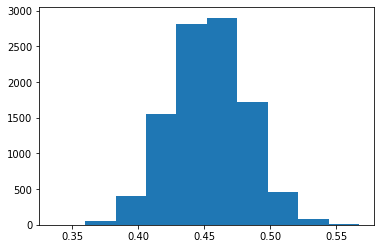

In [48]:
plt.hist(fl)